In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv('/content/생필품 농수축산물 가격 정보(2021년).csv', encoding = 'cp949')
df2 = pd.read_csv('/content/생필품 농수축산물 가격 정보(2020년).csv', encoding = 'cp949')
df3 = pd.read_csv('/content/생필품 농수축산물 가격 정보(2019년).csv', encoding = 'cp949')

In [ ]:
agr1 = pd.merge(df1,df2, how= 'outer')

In [ ]:
agr = pd.merge(agr1,df3, how= 'outer')
agr

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1636107,226,롯데마트 구로점,28,사과,1개 (300g),1598,2021-01,"국내산,부사",2,대형마트,530000,구로구,2021-01-21
1,1636108,226,롯데마트 구로점,27,배,1개 (600g),1590,2021-01,"국내산,신고",2,대형마트,530000,구로구,2021-01-21
2,1636109,226,롯데마트 구로점,26,배추,1포기(2kg),3990,2021-01,국내산,2,대형마트,530000,구로구,2021-01-21
3,1636110,226,롯데마트 구로점,25,무,1개 (900g),1990,2021-01,국내산,2,대형마트,530000,구로구,2021-01-21
4,1636111,226,롯데마트 구로점,24,양파,1개 (200g),990,2021-01,국내산,2,대형마트,530000,구로구,2021-01-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320838,1359195,202,구로시장,312,애호박,1개,1500,2019-01,국내산,1,전통시장,530000,구로구,2019-01-28
320839,1357693,73,뚝도시장,306,"배(신고, 600g)",1개,3900,2019-01,NaN,1,전통시장,200000,성동구,2019-01-28
320840,1359189,202,구로시장,306,"배(신고, 600g)",1개,3500,2019-01,국내산,1,전통시장,530000,구로구,2019-01-28
320841,1357694,73,뚝도시장,307,배추(2.5~3kg),1포기,2500,2019-01,NaN,1,전통시장,200000,성동구,2019-01-28


In [ ]:
# 필요없는 object 열 드롭

agr.drop('실판매규격',axis=1, inplace = True)
agr.drop('점검일자',axis=1, inplace = True)
agr.drop('비고',axis=1, inplace = True)
agr.drop('일련번호',axis=1, inplace = True)

# 나머지 object 열은 삭제해도 나중에 시각화를 했을 때 범례로 나타내기 위해서 '코드 - 이름(문자열)' 형식의 딕셔너리로 백업

#------------------------------------------------------ 자치구 딕셔너리 생성

region_name2 = agr['자치구 이름']
region_code2 = agr['자치구 코드']


region2 = {}

for i in range(len(region_code2)):
  region2[region_code2[i]] = region_name2[i]

#------------------------------------------------------- 품목 딕셔너리 생성

product_name2 = agr['품목 이름']
product_code2 = agr['품목 번호']


product2 = {}

for j in range(len(product_code2)):
  product2[product_code2[j]] = product_name2[j]

#------------------------------------------------------ 시장/마트 식별변호 딕셔너리 생성

market_name2 = agr['시장/마트 번호']
market_code2 = agr['시장/마트 이름']


market2 = {}

for k in range(len(market_code2)):
  market2[market_code2[k]] = market_name2[k]

#------------------------------------------------------ 딕셔너리 생성 확인

print(region2)
print(product2)
print(market2)

#-------------------------------------------------------- object 열 삭제

agr.drop('품목 이름',axis=1, inplace = True)
agr.drop('자치구 이름',axis=1, inplace = True)
agr.drop('시장/마트 이름',axis=1, inplace = True)
agr.drop('시장유형 구분(시장/마트) 코드',axis=1, inplace = True)
agr.drop('시장유형 구분(시장/마트) 이름',axis=1, inplace = True)

#---------------------------------------------------------------------------- 날짜 데이터 변환

agr['년도-월'] = pd.to_datetime(agr['년도-월'])

{530000: '구로구', 110000: '종로구', 140000: '중구', 170000: '용산구', 200000: '성동구', 215000: '광진구', 230000: '동대문구', 260000: '중랑구', 305000: '강북구', 320000: '도봉구', 350000: '노원구', 380000: '은평구', 410000: '서대문구', 440000: '마포구', 470000: '양천구', 500000: '강서구', 560000: '영등포구', 590000: '동작구', 620000: '관악구', 650000: '서초구', 680000: '강남구', 710000: '송파구', 740000: '강동구', 290000: '성북구', 545000: '금천구'}
{28: '사과', 27: '배', 26: '배추', 25: '무', 24: '양파', 23: '상추', 22: '오이', 312: '애호박', 278: '쇠고기', 285: '돼지고기', 18: '닭고기', 171: '달걀(10개)', 320: '달걀(30개)', 303: '조기', 302: '명태', 253: '오징어', 13: '고등어', 305: '사과(부사, 300g)', 306: '배(신고, 600g)', 175: '배추(중간)', 274: '무(세척무, 중)', 309: '양파(1.5kg망)', 310: '상추(100g)', 119: '호박(인큐베이터)', 58: '쇠고기(한우,불고기)', 99: '돼지고기(생삼겹살)', 283: '닭고기(육계)', 260: '조기(냉동,수입산)', 152: '명태(러시아,냉동)', 254: '오징어(생물,국산)', 266: '고등어(생물,국산)', 307: '배추(2.5~3kg)', 311: '오이(다다기)', 265: '명태(생물,수입산)', 304: '고등어', 282: '무(세척무)', 131: '쇠고기(한우1등급)', 136: '조기(국산,생물)', 133: '무(세척무)', 202: '돼지고기(생삼겹살)', 284: '배(중품)', 271:

In [ ]:
len(product2)

93

In [ ]:
agr['가격(원)'].value_counts()

3000     15383
2000     13706
2500     12974
4000     12420
5000     10549
         ...  
5325         1
4575         1
22320        1
3483         1
6760         1
Name: 가격(원), Length: 3407, dtype: int64

In [ ]:
agr = agr.sort_values(by = '가격(원)')
agr = agr.iloc[3694:320843,:]
agr

,시장/마트 번호,품목 번호,가격(원),년도-월,자치구 코드
232424,21,202,1,2019-11-01,560000
277414,213,119,10,2019-07-01,500000
30628,214,312,90,2021-05-01,470000
13538,102,25,100,2021-02-01,470000
272598,146,310,100,2019-08-01,710000
...,...,...,...,...,...
125001,10,256,310000,2020-10-01,170000
233316,94,306,403890,2019-11-01,260000
115830,223,288,34902990,2020-10-01,470000
104017,214,13,35002980,2020-11-01,470000


In [ ]:
agr = agr.iloc[:317146] # 이상치 제거
agr

,시장/마트 번호,품목 번호,가격(원),년도-월,자치구 코드
232424,21,202,1,2019-11-01,560000
277414,213,119,10,2019-07-01,500000
30628,214,312,90,2021-05-01,470000
13538,102,25,100,2021-02-01,470000
272598,146,310,100,2019-08-01,710000
...,...,...,...,...,...
205260,21,131,210000,2020-01-01,560000
156039,40,58,260520,2020-07-01,500000
300061,63,58,288200,2019-05-01,170000
125001,10,256,310000,2020-10-01,170000


In [ ]:
agr = agr.sort_values(by = '년도-월')
agr

,시장/마트 번호,품목 번호,가격(원),년도-월,자치구 코드
320146,42,307,1450,2019-01-01,500000
320789,78,264,3000,2019-01-01,215000
320790,78,256,3000,2019-01-01,215000
320792,202,152,3000,2019-01-01,530000
320826,73,309,3000,2019-01-01,200000
...,...,...,...,...,...
80843,120,256,4000,2021-12-01,440000
80941,223,171,4000,2021-12-01,470000
83751,62,308,1500,2021-12-01,170000
82542,66,305,4000,2021-12-01,305000


In [ ]:
agr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317146 entries, 320146 to 87568
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   시장/마트 번호  317146 non-null  int64         
 1   품목 번호     317146 non-null  int64         
 2   가격(원)     317146 non-null  int64         
 3   년도-월      317146 non-null  datetime64[ns]
 4   자치구 코드    317146 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 14.5 MB


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_

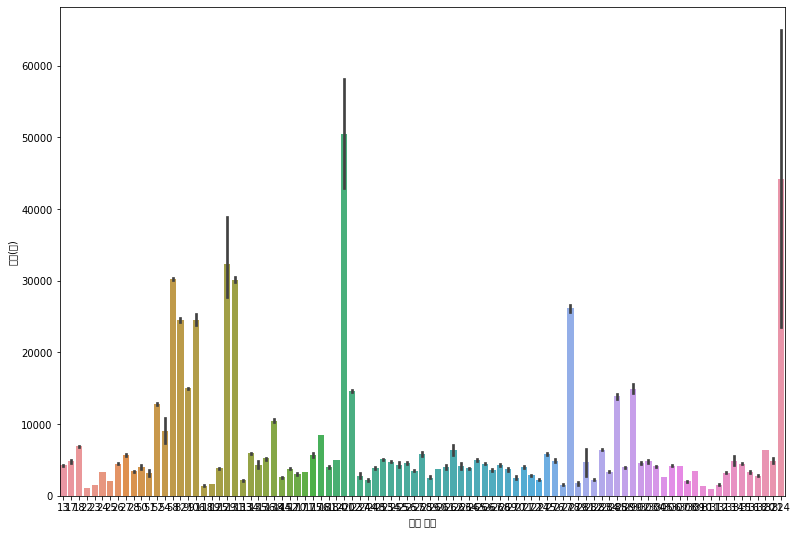

In [ ]:
plt.figure(figsize = (13,9))
sns.barplot(data = agr, x='품목 번호', y = '가격(원)')
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text

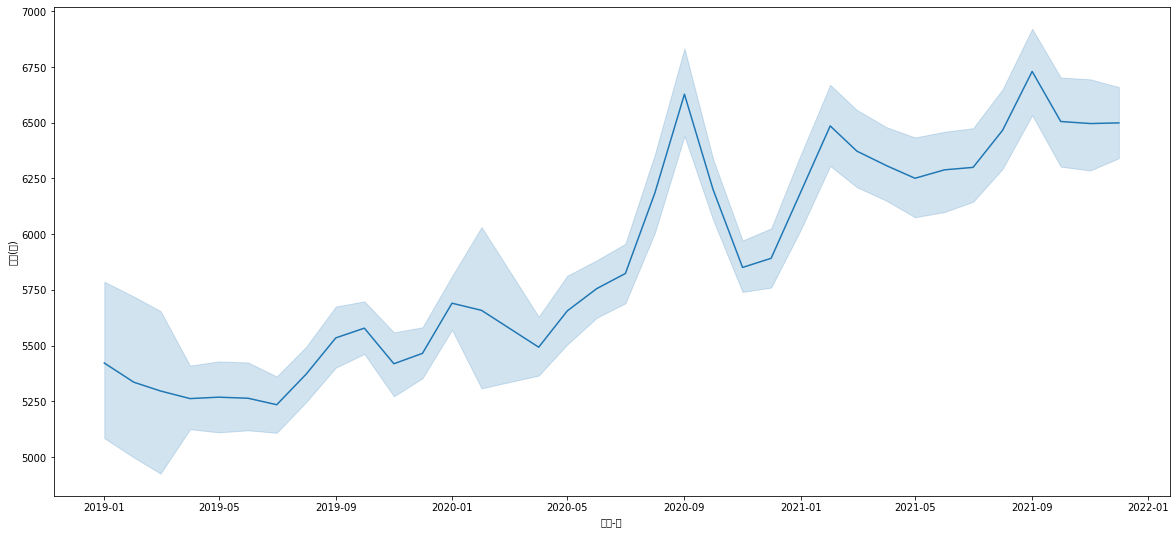

In [ ]:
plt.figure(figsize = (20,9))
sns.lineplot(data = agr, x='년도-월', y = '가격(원)')

In [ ]:
agr['년도-월'] = agr['년도-월'].dt.year

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text

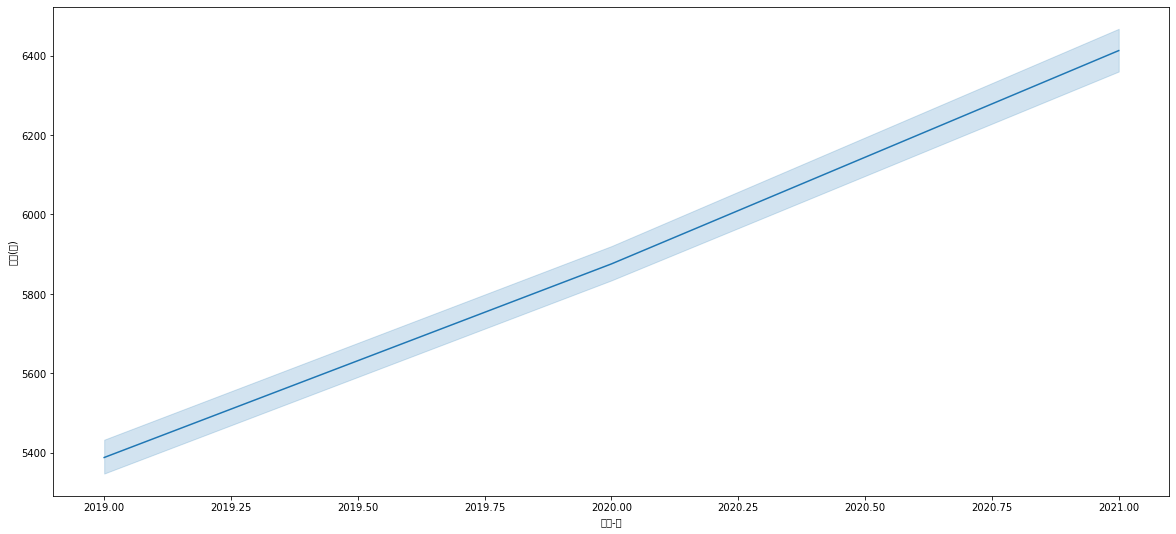

In [ ]:
plt.figure(figsize = (20,9))
sns.lineplot(data = agr, x='년도-월', y = '가격(원)')

# 훈련과 시험

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = agr.drop('가격(원)', axis = 1)
y = agr['가격(원)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2, random_state=22
)

# 모델링 : 결정트리

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor(random_state=21)

In [ ]:
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=21)

In [ ]:
pred = model.predict(X_test)
pred

array([ 5520.71794872,  3392.5       ,  5353.36585366, ...,
       12728.94736842,  3462.85714286,  6365.        ])

In [ ]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=21)

In [ ]:
train_pred = model.predict(X_train)

# 훈련셋을 예측하여 overfitting 여부를 보기위함

test_pred = model.predict(X_test)

#1. train은 높은데 test가 그만큼 안나올 때 - 오버피팅
#2. train이 현저히 낮을때 - 언더피팅

# 평가 : 결정트리

In [ ]:
from sklearn.metrics import mean_squared_error,accuracy_score

In [ ]:
print(
    f"train_rmse : {mean_squared_error(y_train, train_pred, squared = False)}",
    f"test_rmse : {mean_squared_error(y_test, test_pred, squared = False)}"
)

train_rmse : 2355.1712437754227 test_rmse : 2856.19577909466


In [ ]:
model.score(X_train, y_train)

0.9042311866440855